In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
# for more information read "19-Intro2ML-HodaDataset.ipynb"
import cv2
import numpy as np
from scipy import io

def load_hoda(training_sample_size=1000, test_sample_size=200, size=5):
    #load dataset
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat('Data_hoda_full.mat')

    #test and training set
    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])

    #resize
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    #reshape
    X_train = [x.reshape(size*size) for x in X_train_5by5]
    X_test = [x.reshape(size*size) for x in X_test_5by_5]
    
    return X_train, y_train, X_test, y_test

In [6]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [12]:
# 1. Import libraries and modules
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(123)  # for reproducibility

# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=10000,
                                                                        test_sample_size=5000,size=28)

# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)


# test and validation set
x_val = x_test[:5000]
x_test = x_test[5000:]
y_val = y_test[:5000]
y_test = y_test[5000:]

# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model.fit(x_train, y_train,
          epochs=20, batch_size=256, validation_data = (x_val, y_val))



Train on 10000 samples, validate on 5000 samples
Epoch 1/20
10000/10000 [==============================] - 9s 927us/step - loss: 1.3724 - acc: 0.5474 - val_loss: 0.4559 - val_acc: 0.8450
Epoch 2/20
10000/10000 [==============================] - 9s 872us/step - loss: 0.5123 - acc: 0.8174 - val_loss: 0.2209 - val_acc: 0.9342
Epoch 3/20
10000/10000 [==============================] - 9s 865us/step - loss: 0.3311 - acc: 0.8919 - val_loss: 0.1593 - val_acc: 0.9500
Epoch 4/20
10000/10000 [==============================] - 9s 857us/step - loss: 0.2595 - acc: 0.9146 - val_loss: 0.1309 - val_acc: 0.9596
Epoch 5/20
10000/10000 [==============================] - 9s 858us/step - loss: 0.2205 - acc: 0.9280 - val_loss: 0.1058 - val_acc: 0.9650
Epoch 6/20
10000/10000 [==============================] - 9s 870us/step - loss: 0.1894 - acc: 0.9418 - val_loss: 0.0943 - val_acc: 0.9686
Epoch 7/20
10000/10000 [==============================] - 9s 880us/step - loss: 0.1648 - acc: 0.9490 - val_loss: 0.0950 - v

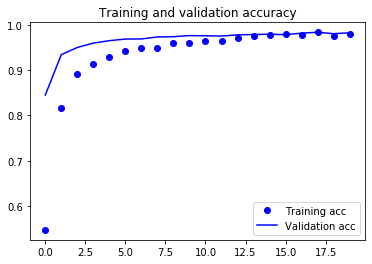

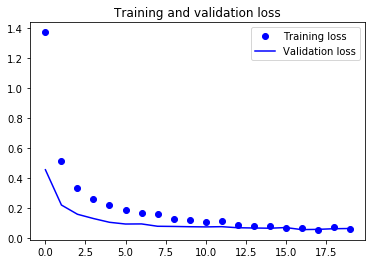

final accuracy on tst data is :  0.9799


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [17]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

5000/5000 [==============================] - 2s 322us/step

Testing loss: 0.05, acc: 0.98%


In [33]:
predicted_classes = model.predict_classes(x_test)
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test_original[5000:], predicted_classes))
#confusion_matrix(y_test,predicted_classes)

predicted:
[8 9 3 ... 9 9 7]
True Label:
[5 8 8 ... 9 9 7]
Confusion matrix:
[[470  18   0   0   0   2   0   1   1   1]
 [  8 510   0   0   0   0   1   0   0   2]
 [  0   2 497   3   2   0   0   0   0   1]
 [  0   0   9 481   5   0   0   0   0   0]
 [  0   0   0   2 490   1   0   0   0   0]
 [  3   0   0   0   1 508   1   0   0   0]
 [  0   1   1   0   2   0 470   0   0   2]
 [  0   0   1   0   2   0   0 494   0   0]
 [  0   0   0   0   0   0   0   0 508   2]
 [  0   0   1   0   1   1   4   0   0 490]]
